In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import arviz as az
import numpy as np

In [66]:
flows = pd.read_csv(r"..\..\UK-wood-mfa\build\flows.csv")
flows_obs= pd.read_csv(r'..\..\UK-wood-mfa\build\flows_obs.csv')
Observations = pd.read_excel(r"..\..\UK-wood-mfa\data\observations_with_references.xlsx")
flows_name = pd.read_excel(r'..\..\UK-wood-mfa\lists\flows_name.xlsx')
#products_consumption = pd.read_excel(r'..\..\UK-wood-mfa\data_analysis\finished_products_consumption.xlsx')
#products_consumption = products_consumption.set_index(['target'])



In [67]:
flows_name = list(flows_name.to_records())
flows_obs_list = list(flows_obs.to_records())

In [68]:
link = 'http://ukfires.org/analyses/UK-wood/system/'
Consumption = 'Consumption'

In [69]:
#UK consumption of finished products
link = 'http://ukfires.org/analyses/UK-wood/system/'
consumed_products = []
for flow in flows_name:
            consumption_flow_products = flows.loc[(flows['material'] == flow[3]) 
                                       & (flows['source'] == flow[1])
                                       & (flows['target'] == flow[2])]
            if (((link + 'PackagingConsumption') in flow[2])
                or ((link + 'GraphicPapersConsumption') in flow[2])
                or ((link + 'SanitaryPapersConsumption') in flow[2])
                or ((link + 'OtherPaperProductsConsumption') in flow[2])
                 

                or ((link + 'WindowsConsumption') in flow[2]) 
                or ((link + 'DoorsConsumption') in flow[2])
                or ((link + 'FlooringConsumption') in flow[2])
                
                or ((link + 'PalletsConsumption') in flow[2])
                or ((link + 'RefurbishedPalletsConsumption') in flow[2])
                or ((link + 'OtherWoodContainersConsumption') in flow[2])
                 
                or ((link + 'DeckingConsumption') in flow[2])
                or ((link + 'FencingPostsConsumption') in flow[2])
                or ((link + 'WoodenOutbuildingsConsumption') in flow[2])
                or ((link + 'FencingRailsAndBoardsConsumption') in flow[2])
                 
                 
                or ((link + 'OtherEnergyFeedstocksConsumption') in flow[2])
                or ((link + 'PreConsumerWasteProductsConsumption') in flow[2])
                or ((link + 'WoodCharcoalConsumption') in flow[2])
                
                or ((link + 'WoodPelletsConsumption') in flow[2])
                 
                or ((link + 'WoodFloorFramingForNewStructures') in flow[2])
                or ((link + 'WoodRoofsForNewStructures') in flow[2])
                or ((link + 'WoodFramesForNewStructures') in flow[2])
                 
                or ((link + 'RenovationsSawnwoodConsumption') in flow[2])
                or ((link + 'SawnwoodToRMIAndOtherConsumption') in flow[2])
                or ((link + 'ParticleboardToRMIAndOtherConsumption') in flow[2])
                or ((link + 'PlywoodToRMIAndOtherConsumption') in flow[2])
                or ((link + 'OtherEngineeredWoodProductsConsumption') in flow[2])
                 
                or ((link + 'WoodenKitchenFurnitureConsumption') in flow[2])
                or ((link + 'WoodenSeatsConsumption') in flow[2])
                or ((link + 'WoodenBedroomFurnitureConsumption') in flow[2])
                or ((link + 'WoodenOfficeFurnitureConsumption') in flow[2])
                or ((link + 'WoodenOtherFurnitureConsumption') in flow[2])
                 
                or ((link + 'FormworkScaffoldingConsumption') in flow[2])
                or ((link + 'OtherObjectsConsumption') in flow[2]
                or ((link + 'WoodWoolAndFlourConsumption') in flow[2])
                or ((link + 'FibreboardToRMIAndOtherConsumption') in flow[2])
                or ((link + 'RailwaySleepersConsumption' ) in flow[2]))):
                    if ((('exports') not in flow[2])
                        and (('imports') not in flow[1])
                       # and (('Consumption') not in flow[2])
                        and (('Manufacturing') not in flow[2])
                        and (('WoodFibres') not in flow[2])
                        and (('Roundwood') not in flow[2])
                        and (('PostConsumerWood') not in flow[2])
                        and (('Production') not in flow[2])
                        and (('ByProducts') not in flow[2])):
                                                            
                            consumption_flow_products = consumption_flow_products.set_index("target")
                          


                            consumption_products_renamed= consumption_flow_products.rename(index={
                                                                                                  link + 'OtherObjectsConsumption' : 'Other objects',
                                                                                                   link + 'FormworkScaffoldingConsumption': 'Sawnwood to construction',
                                                                                                   link + 'RailwaySleepersConsumption' : 'Sawnwood to construction',
                                                                                                   link + 'WoodCharcoalConsumption': 'Other energy feedstocks',
                                                                                                   link + 'WoodWoolAndFlourConsumption' : 'Other objects',
                                                                                                    link + 'OtherEngineeredWoodProductsConsumption' : 'Other engineered products to construction',
                                                                                        
                                                                                                   link + 'GraphicPapersConsumption': 'Graphic papers',
                                                                                                   link + 'WindowsConsumption': 'Joinery',
                                                                                                   link + 'DoorsConsumption': 'Joinery',
                                                                                                   link + 'FlooringConsumption': 'Joinery',
                                                                                                   link + 'PreConsumerWasteProductsConsumption': 'Industrial residues',
                                                                                                   link + 'OtherWoodContainersConsumption': 'Other containers',
                                                                                                   link + 'SanitaryPapersConsumption': 'Sanitary papers',
                                                                                                   link + 'PackagingConsumption': 'Packaging',
                                                                                                   link + 'PalletsConsumption' : 'Pallets',
                                                                                                   link + 'RefurbishedPalletsConsumption' : 'Refurbished pallets',
                                                                                                   link + 'OtherPaperProductsConsumption': 'Other papers',
                                                                                                   link + 'WoodenKitchenFurnitureConsumption' : 'Furniture',
                                                                                                   link + 'WoodenSeatsConsumption': 'Furniture',
                                                                                                   link + 'WoodenBedroomFurnitureConsumption': 'Furniture',
                                                                                                   link + 'WoodenOfficeFurnitureConsumption': 'Furniture',
                                                                                                   link + 'WoodenOtherFurnitureConsumption': 'Furniture',

                                                                                        
                                                                                                   link + 'PreConsumerWasteProductsConsumption': 'Industrial residues',
                                                                                                   link + 'PreConsumerWasteConstructionConsumption': 'Industrial residues',

                                                        
                                                                                                   link + 'FencingRailsAndBoardsConsumption': 'Fencing and Outdoors',
                                                                                                   link + 'FencingPostsConsumption': 'Fencing and Outdoors',
                                                                                                  

                                                                                                   link + 'OtherEnergyFeedstocksConsumption': 'Other energy feedstocks',


                                                                                                   link + 'WoodPelletsConsumption': 'Wood pellets',


                                                                                                   link + 'WoodFloorFramingForNewStructures': 'Structure',
                                                                                                   link + 'WoodRoofsForNewStructures': 'Structure',
                                                                                                   link + 'WoodFramesForNewStructures': 'Structure',

                                                                                                   link + 'RenovationsSawnwoodConsumption': 'Prefab products',
                                                                                                   link + 'SawnwoodToRMIAndOtherConsumption': 'Sawnwood to construction',
                                                                                                   link + 'ParticleboardToRMIAndOtherConsumption': 'Particleboard to construction',
                                                                                                   link + 'PlywoodToRMIAndOtherConsumption': 'Plywood to construction',
                                                                                                   link + 'FibreboardToRMIAndOtherConsumption': 'Fibreboard to construction',
                                                                                                    })


                            consumed_products.append(consumption_products_renamed)

                   
consumed_products = pd.concat(consumed_products)  


consumed_products= consumed_products.reset_index(level='target')
consumed_products = consumed_products.groupby(['target','sample']).sum()
consumed_products = consumed_products.reset_index(level='sample')
consumed_products= consumed_products.reset_index(level='target')
consumed_products.to_clipboard()
consumed_products['value']=consumed_products['value'] / 1000000000 
consumed_products.to_clipboard()
consumed_products.to_excel(r"..\..\UK-wood-mfa\data_for_box_plot_uncertainty_Figure_3_manuscript\data_box_plot_Figure_3.xlsx")

C:\Users\rla44\AppData\Local\Temp\ipykernel_23028\4040517127.py:128: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  consumed_products = consumed_products.groupby(['target','sample']).sum()


In [52]:
consumed_products.to_clipboard()

In [53]:
custom_order = [
   "Other energy feedstocks",
     "Wood pellets",
   
     
   
    
      "Pallets",
     "Other containers",
    "Refurbished pallets",
   "Fencing and Outdoors",
       "Furniture",
     "Other objects",
    
    "Plywood to construction",
     "Fibreboard to construction",
    'Other engineered products to construction',
     
   
   
  "Particleboard to construction",
    "Structure",
    "Sawnwood to construction",
       "Joinery",
    
     "Industrial residues",
    
  #  "papers",
    
   
   
 
    "Other papers",
    "Graphic papers",
    
    "Sanitary papers",
    "Packaging",
]

# Convert 'target' column to a categorical data type with the custom order
consumed_products["target"] = pd.Categorical(consumed_products["target"], categories=custom_order, ordered=True)

# Sort the DataFrame based on the 'target' column
consumed_products_sorted = consumed_products.sort_values(by="target")

# Reset the index to maintain a continuous index
consumed_products_sorted = consumed_products_sorted.reset_index(drop=True)


In [54]:
Means = consumed_products_sorted.groupby('target')['value'].mean()
df= pd.DataFrame(Means)


C:\Users\rla44\AppData\Local\Temp\ipykernel_23028\1426664112.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\rla44\AppData\Local\Temp\ipykernel_23028\1426664112.py:51: UserWarning: The palette list has more values (20) than needed (19), which may not be intended.
  sns.violinplot(


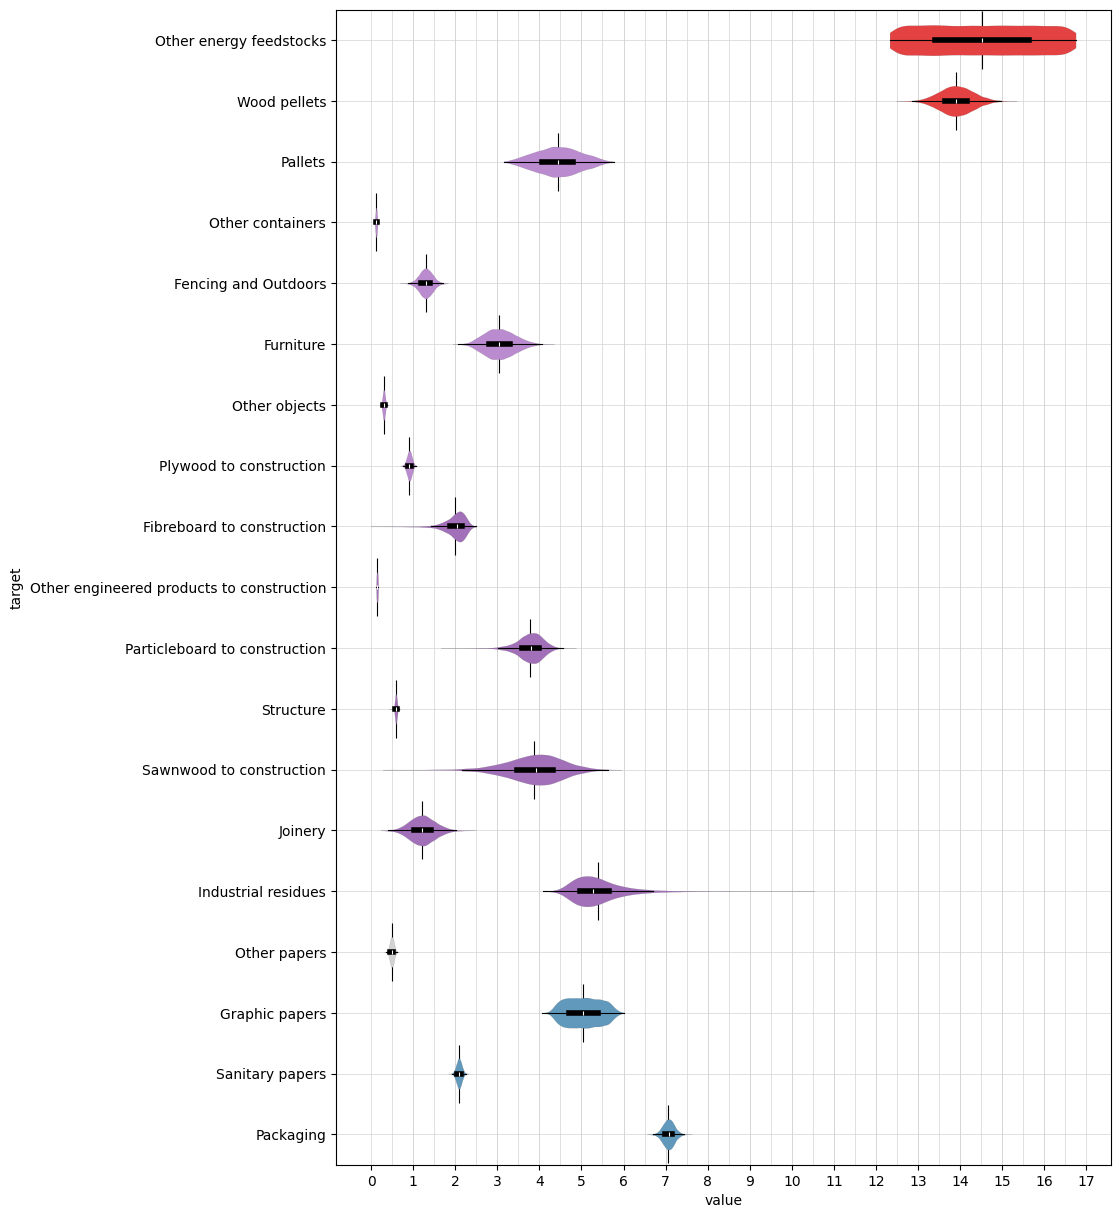

,Object,Uncertainty index,min,max,mean,median,diff_min,diff_max
0,Other energy feedstocks,0.152856,12.322798,16.741854,14.522072,14.517312,2.199274,-2.219782
1,Wood pellets,0.075967,12.857439,14.961088,13.904787,13.900939,1.047348,-1.056301
2,Pallets,0.303548,3.150010,5.786040,4.438685,4.434506,1.288674,-1.347356
3,Other containers,0.397340,0.073802,0.170692,0.122155,0.122042,0.048353,-0.048537
4,Fencing and Outdoors,0.320935,0.884881,1.717560,1.300260,1.300953,0.415380,-0.417300
5,Furniture,0.328116,2.060373,4.054232,3.052618,3.040506,0.992245,-1.001614
6,Other objects,0.252709,0.227326,0.380474,0.303721,0.303477,0.076396,-0.076753
7,Plywood to construction,0.169774,0.757126,1.062357,0.908173,0.909704,0.151046,-0.154184
8,Fibreboard to construction,0.261937,1.428909,2.504441,1.984600,2.039911,0.555692,-0.519840
9,Other engineered products to construction,0.197063,0.117863,0.173722,0.145124,0.145117,0.027261,-0.028598


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

         
# Set the figure size
fig =plt.figure(figsize=(10, 15))

# Define the range for vertical lines (from min to max x-values)
x_min = 0
x_max = 17
step = 0.5  # Interval between vertical lines

#plot mean on the graph
marker_size = 1700
plt.scatter(df['value'], df.index, marker='|',linewidths=0.8, s=marker_size, color='black', label='Mean',zorder=2)


# Plot vertical lines at 0.5 intervals
for x in np.arange(x_min + step, x_max, step):
    plt.axvline(x, color="lightgrey", linestyle="-", linewidth=0.5, zorder=0,)
    
density = 18
x = np.linspace(0, 17, density, endpoint=True)
plt.xticks(x,zorder=1)
# plt.axvline(0, c='k', alpha=0.5)

# Create a box plot with 'target' on the y-axis and 'value' on the x-axis
custom_palette = [
                "#ff2727",
                 "#ff2727",
               
                 "#bf7fdb",
                 "#bf7fdb",
                 "#bf7fdb",
                 "#bf7fdb",
                 "#bf7fdb",
                 "#bf7fdb",
                 "#a764c4",
                "#a764c4",
                 "#a764c4",
                 "#a764c4",
                 "#a764c4",
                 "#a764c4",
                 "#a764c4",
                "lightgrey",
                 "#529dcb", 
                  "#529dcb", 
                  "#529dcb",
                  "#529dcb",
                 ]
sns.violinplot(
    x="value",
    y="target",
    width=0.5,
   # hue= "target",
    palette=custom_palette,
    data=consumed_products,
    linewidth=0.1,
   # hue="target",
    density_norm="width",
    orient="h",
    inner_kws=dict(box_width=4, whis_width=0.8, color="black"),
    inner="box",
    cut=0,
    zorder=2,
)

# Set the title of the plot
plt.title("")

# Calculate the difference ratio for each unique 'target'
difference_ratios = []  # List to store the ratios

# Group the data by 'target'
grouped = consumed_products.groupby("target")

for name, group in grouped:
    data = group["value"]
    k = 1.5

    # Calculate quartiles and IQR
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # Calculate bounds for outlier detection
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    # Exclude outliers
    filtered_data = [x for x in data if lower_bound <= x <= upper_bound]

    # Calculate minimum and maximum within the non-outlier range
    min_non_outlier = np.min(filtered_data)
    max_non_outlier = np.max(filtered_data)
    
    mean_val = group["value"].mean()
    min_val = group["value"].min()
    max_val = group["value"].max()
    median_val = group["value"].median()
    Diff_min =  mean_val - min_non_outlier
    Diff_max =  mean_val - max_non_outlier

    difference_ratio = (max_non_outlier - mean_val) / mean_val

    difference_ratios.append((name, difference_ratio,min_non_outlier,max_non_outlier, mean_val,median_val, Diff_min, Diff_max) )  # Store the target name and ratio
    
    
difference_ratios
plt.grid(True,linewidth=0.5, color="lightgrey")

plt.show()

difference_ratio_df = pd.DataFrame(difference_ratios, columns=['Object', 'Uncertainty index', 'min', 'max', 'mean', 'median', 'diff_min', 'diff_max'])
difference_ratio_df


In [56]:
# Sort the DataFrame by the 'Value' column in descending order
df = difference_ratio_df .sort_values(by='Uncertainty index', ascending=False)
df= df.set_index('Object')


# Create a gradient color map for the 'Value' column
def gradient_color(val):
    max_val = df['Uncertainty index'].max()
    min_val = df['Uncertainty index'].min()
    normalized_value = (val - min_val) / (max_val - min_val)
    r = int(255 * (1 - normalized_value))
    return f'background-color: rgba(255, {r}, 2, 0.5)'


styled_df = df.style.applymap(lambda x: gradient_color(x), subset=['Uncertainty index'])

# Display the styled DataFrame

styled_df

,Uncertainty index,min,max,mean,median,diff_min,diff_max
Object,,,,,,,
Joinery,0.655210,0.413076,2.024969,1.223391,1.217028,0.810315,-0.801578
Sawnwood to construction,0.454726,2.170964,5.635853,3.874168,3.925564,1.703204,-1.761685
Other containers,0.397340,0.073802,0.170692,0.122155,0.122042,0.048353,-0.048537
Furniture,0.328116,2.060373,4.054232,3.052618,3.040506,0.992245,-1.001614
Fencing and Outdoors,0.320935,0.884881,1.717560,1.300260,1.300953,0.415380,-0.417300
Pallets,0.303548,3.150010,5.786040,4.438685,4.434506,1.288674,-1.347356
Other papers,0.266544,0.362579,0.625213,0.493636,0.493231,0.131058,-0.131576
Fibreboard to construction,0.261937,1.428909,2.504441,1.984600,2.039911,0.555692,-0.519840
Other objects,0.252709,0.227326,0.380474,0.303721,0.303477,0.076396,-0.076753


In [57]:
# Specify the file path along with the file name
file_path = r'C:/Users\rla44/OneDrive - University of Bath\MFA graphs/sankey_diagram_0811'


# Save the plot with the specified file path
fig.savefig(file_path, format='pdf')

# Optionally, specify DPI for higher quality
# plt.savefig(file_path, format='pdf', dpi=300)